# Retail Store Analytics

> ### Technical Skills for this Project: Python(Pandas, Seaborn), EDA, Statistics.

- This project is for the retail sector
- The development focused on EDA and finding useful Insights.
- I will only use Python

---

###### Task Details: 
One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – im going to diagnose which departments are being affected and to what extent.

I need to analyze the data set to understand this problem and propose data-driven solutions.

## Table of contents
1. [Exploratory Data Analysis](#paragraph1)
2. [Insights](#paragraph2)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# First view to the dataset's
Store = pd.read_csv('Store_sales.csv', parse_dates=['Date'])

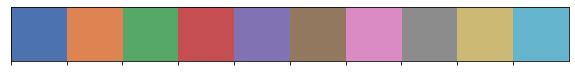

In [3]:
palette = sns.color_palette("deep")
sns.palplot(palette)
sns.set_palette("deep")

## Section 01: Exploratory Data Analysis <a name="paragraph1"></a>

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Extracting Dates
Store['year'] = Store['Date'].dt.year
Store['month'] = Store['Date'].dt.month

In [6]:
Store.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
year                     int64
month                    int64
dtype: object

> No Cleaning required

In [7]:
Store.duplicated().sum()

0

> No Duplicates

In [8]:
Store.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
dtype: int64

> No Null values

In [9]:
correlation = Store.corr(method='pearson')
correlation2 = Store.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [10]:
Store.drop(['year', 'month', 'Holiday_Flag'], axis=1).describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,60.66,3.36,171.58,8.00
std,12.99,564366.62,18.44,0.46,39.36,1.88
min,1.00,209986.25,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,47.46,2.93,131.74,6.89
50%,23.00,960746.04,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,74.94,3.73,212.74,8.62
max,45.00,3818686.45,100.14,4.47,227.23,14.31


In [11]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


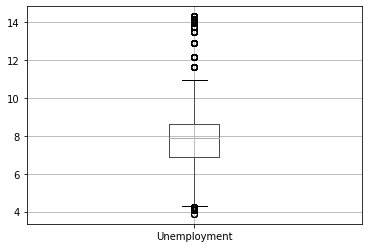

In [12]:
boxplot = Store.boxplot(column=[ 'Unemployment'])

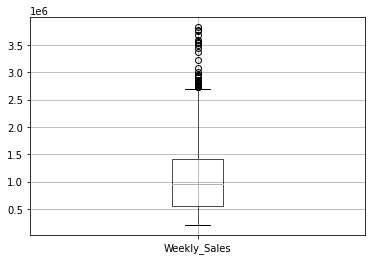

In [13]:
boxplot = Store.boxplot(column=[ 'Weekly_Sales'])

---

In [14]:
Store.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

Store
20   301397792.46
4    299543953.38
14   288999911.34
13   286517703.80
2    275382440.98
Name: Weekly_Sales, dtype: float64

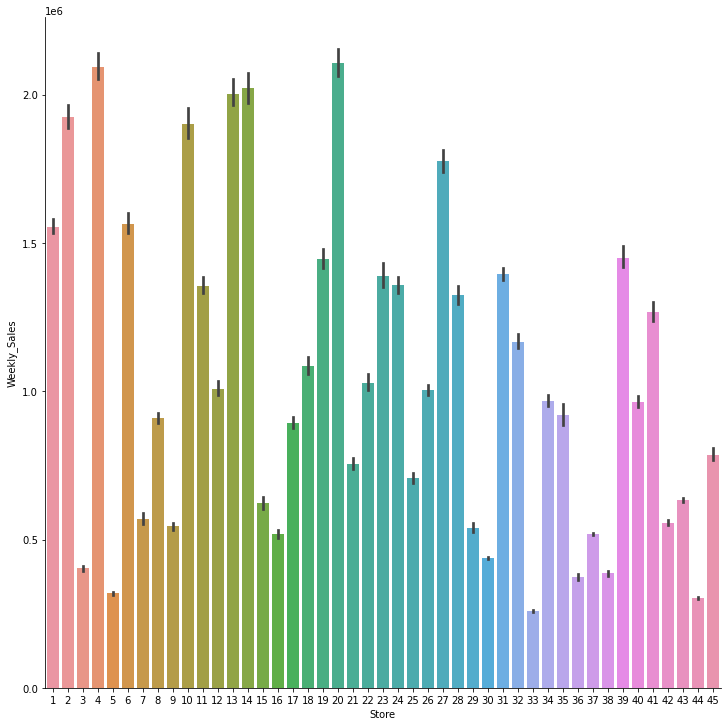

In [15]:
sns.catplot(x="Store", y="Weekly_Sales", kind="bar",height=10,data=Store)

In [16]:
Store.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False).head(1)

Store
14   317569.95
Name: Weekly_Sales, dtype: float64

In [17]:
#maximun coefficient variation
max_coeff_var = ((Store.groupby('Store')['Weekly_Sales'].std())/(Store.groupby('Store')['Weekly_Sales'].mean()))*100
max_coeff_var.sort_values(ascending=False).head(5)

Store
35   22.97
7    19.73
15   19.34
29   18.37
23   17.97
Name: Weekly_Sales, dtype: float64

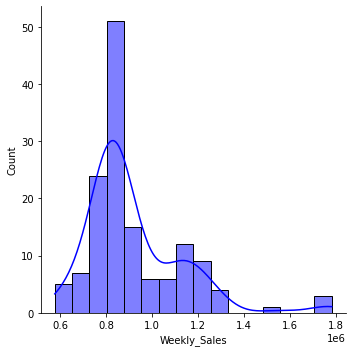

In [18]:
# Remenber that std or Max coefficient of mean to standard deviation can be checked in a distribution plot to corroborate
stores = Store.groupby('Store')
store_35 = stores.get_group(35)
sns.displot(store_35.Weekly_Sales, color='blue', label='Weekly Sales for Store 35', kde=True)

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

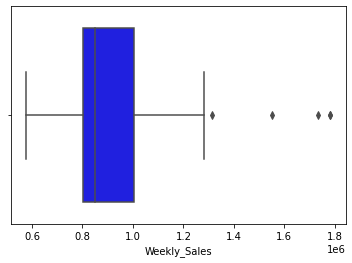

In [19]:
sns.boxplot(store_35.Weekly_Sales, color='blue')

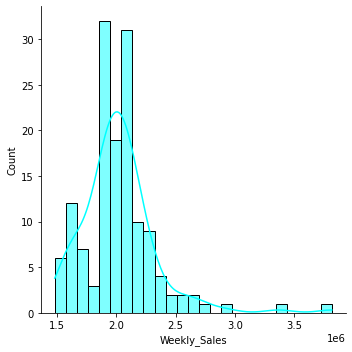

In [20]:
stores = Store.groupby('Store')
store_14 = stores.get_group(14)
sns.displot(store_14.Weekly_Sales, color='cyan', label='Weekly Sales for Store 14', kde=True)

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

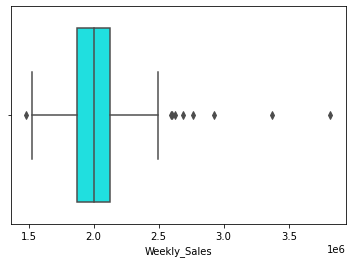

In [21]:
sns.boxplot(store_14.Weekly_Sales, color='cyan')

In [22]:
Store.groupby('Store')['Unemployment'].sum().sort_values(ascending=False).head(1)

Store
12   1875.66
Name: Unemployment, dtype: float64

In [23]:
out = Store.sort_values(by=["Store", "Date"]) \
        .groupby(["Store"]) \
        .agg(growth_Q3=("Weekly_Sales", lambda x: (x.iloc[2] - x.iloc[1])/(x.iloc[1]) * 100))
out.idxmax()

growth_Q3    16
dtype: int64

In [24]:
# Sales for third quarterly in 2012
Q3 = Store[(Store['Date'] > '2012-07-01') & (Store['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = Store[(Store['Date'] > '2012-04-01') & (Store['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

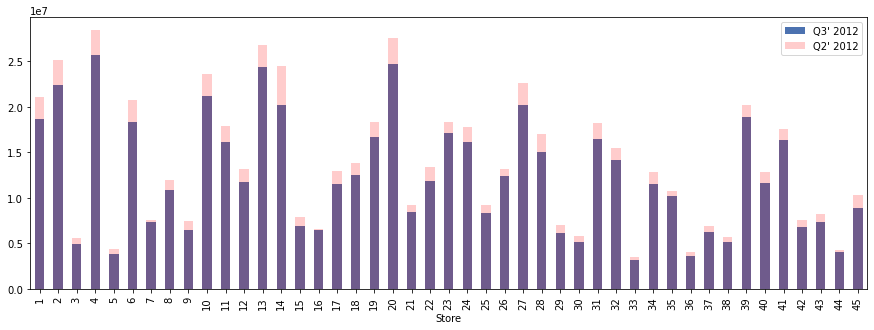

In [25]:
plt.figure(figsize=(15,5))
# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);

In [26]:
Q3.idxmax()+Q3.max()

25652123.35

#### Notes:
Which store had maximum sales?
> The Store with maximun sales is the number 20 with 301,397,792

Which store had maximum standard deviation? the sales vary a lot.

> The store 14 had maximum standard deviation and store 35 has maximum Coefficient of Variance.

Wich store had the more unemployment?

> Store Number 12 had the more unemployment rate

Which store/s has good quarterly growth rate in Q3’2012

> Store number 16 had the maximun growth rate in Q3 overall

> Store number 4 had the the best quarterly growth rate in Q3’2012

> Sales and Unemployment have Outliers, going to deal with it later in the analysis

---

In [27]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


In [28]:
Store.drop(['year', 'month', 'Holiday_Flag'], axis=1).describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,60.66,3.36,171.58,8.00
std,12.99,564366.62,18.44,0.46,39.36,1.88
min,1.00,209986.25,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,47.46,2.93,131.74,6.89
50%,23.00,960746.04,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,74.94,3.73,212.74,8.62
max,45.00,3818686.45,100.14,4.47,227.23,14.31


In [29]:
Store.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

Date
2010-12-24   80931415.60
2011-12-23   76998241.31
2011-11-25   66593605.26
2010-11-26   65821003.24
2010-12-17   61820799.85
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Date'>

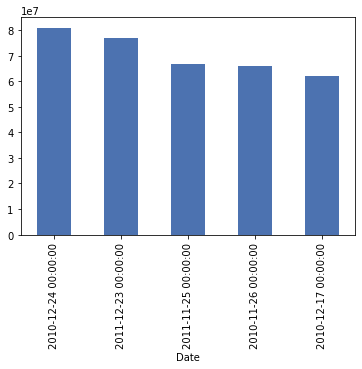

In [30]:
Store.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

In [31]:
#Store[(Store['Date'] == '2010-12-24')].sort_values(by='Date',ascending=False)

In [32]:
Store.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=True).head(5)

Date
2011-01-28   39599852.99
2012-01-27   39834974.67
2010-12-31   40432519.00
2011-01-21   40654648.03
2011-01-14   40673678.04
Name: Weekly_Sales, dtype: float64

In [33]:
Store[(Store['Temperature'] >= 100)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
4599,33,2010-07-16,280937.84,0,100.14,2.97,126.15,9.49,2010,7
4707,33,2012-10-08,297753.49,0,100.07,3.81,130.76,7.15,2012,10


In [34]:
Store[(Store['Temperature'] <= 0)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
910,7,2011-04-02,558027.77,0,-2.06,3.01,191.76,8.82,2011,4


In [35]:
Store[(Store['Fuel_Price'] >= 4.45)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
1427,10,2012-12-10,1713889.11,0,76.03,4.47,131.11,6.94,2012,12
1713,12,2012-12-10,934917.47,0,71.74,4.47,131.11,10.20,2012,12
4001,28,2012-12-10,1205536.71,0,71.74,4.47,131.11,10.20,2012,12
4716,33,2012-12-10,291781.15,0,79.64,4.47,131.11,6.89,2012,12
5431,38,2012-12-10,437320.66,0,71.74,4.47,131.11,10.20,2012,12
6003,42,2012-12-10,612379.90,0,76.03,4.47,131.11,6.94,2012,12


In [36]:
Store[(Store['Fuel_Price'] <= 2.48)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
5007,36,2010-02-19,470281.03,0,45.66,2.47,210.05,8.55,2010,2


<AxesSubplot:xlabel='year'>

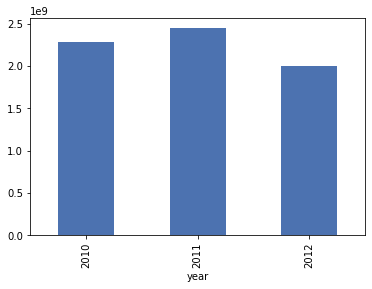

In [37]:
Store.groupby('year')['Weekly_Sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='month'>

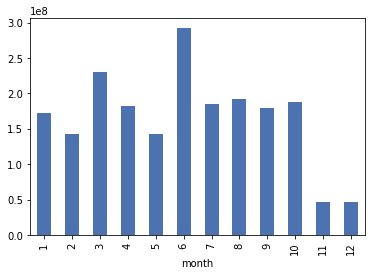

In [38]:
Store[(Store['year'] == 2012)].groupby('month')['Weekly_Sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='month'>

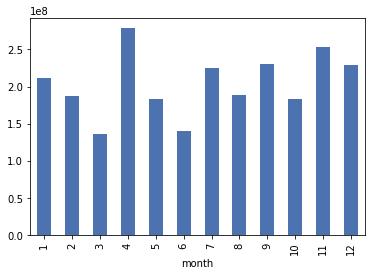

In [39]:
Store[(Store['year'] == 2011)].groupby('month')['Weekly_Sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='month'>

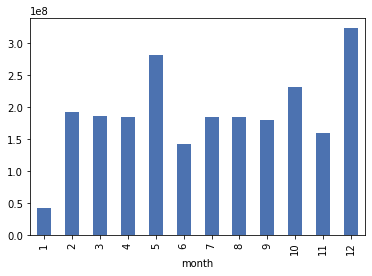

In [40]:
Store[(Store['year'] == 2010)].groupby('month')['Weekly_Sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='year'>

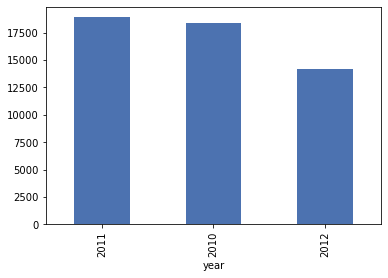

In [41]:
Store.groupby('year')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

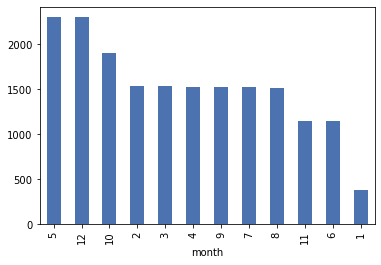

In [42]:
Store[(Store['year'] == 2010)].groupby('month')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

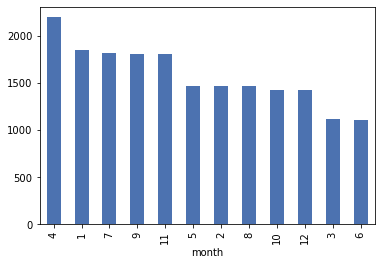

In [43]:
Store[(Store['year'] == 2011)].groupby('month')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

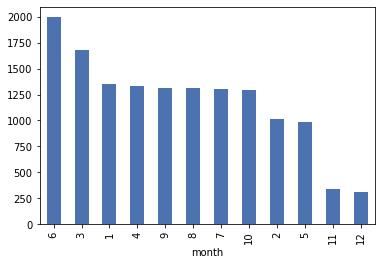

In [44]:
Store[(Store['year'] == 2012)].groupby('month')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

#### Notes:

The date with highest sales is?

> The date with the highest Sales was 2010-December-24 and the date with least Sales was 2011-January-28

Which Date had the warmer and the cooler temperature, it went in holiday? What's the mean?

> Store 33, 2010-07-16 and 2012-10-08 had the warmer days with a 100f, Store 07, 2011-04-02 had the coldest day with -2f, the median temperature is 60f

Which date had the maximum and the minimum fuel price, what's the mean?

> 2012-12-10 had the highest fuel price with 4.47, 2010-02-19 had the least fuel price with 2.47, the mean fuel price is 3.36

Which Year had the more and less sales, and the more and less unemployment

> The year with the highest sales was 2011 and the year with least sales was 2012 **sales decrease**

> The year with the highest unemployment was 2011 and the year with the least unemployment was 2012 **unemployment decrease**

Which month had the more and less Sales, and the more and less unemployment

> 2010 had the highest sales in December, 2011 had the highest sales in April, 2012 had the highest sales in April

> 2010 had the highest unemployment in May, 2011 had the highest unemployment in April, 2012 had the highest unemployment in June

---

In [45]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


In [46]:
Store['Holiday_Flag'].value_counts()/len(Store)*100

0   93.01
1    6.99
Name: Holiday_Flag, dtype: float64

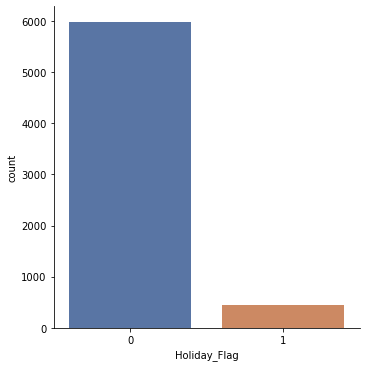

In [47]:
sns.catplot(x="Holiday_Flag", kind="count", data=Store)

In [48]:
Store.groupby('Holiday_Flag')['Weekly_Sales'].sum()

Holiday_Flag
0   6231919435.55
1    505299551.56
Name: Weekly_Sales, dtype: float64

In [49]:
Store[(Store['Holiday_Flag'] == 1)].mean()

<ipython-input-49-f6c31055cffe>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Store[(Store['Holiday_Flag'] == 1)].mean()


Store               23.00
Weekly_Sales   1122887.89
Holiday_Flag         1.00
Temperature         50.23
Fuel_Price           3.23
CPI                171.27
Unemployment         8.07
year              2010.80
month               10.50
dtype: float64

In [50]:
hol = Store[(Store['Holiday_Flag'] == 1)]

In [51]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
SB = hol[(hol['month'] == 2)]

In [52]:
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
LD = hol[(hol['month'] == 9)]

In [53]:
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
T = hol[(hol['month'] == 11)]

In [54]:
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
C = hol[(hol['month'] == 12)]

<AxesSubplot:xlabel='month'>

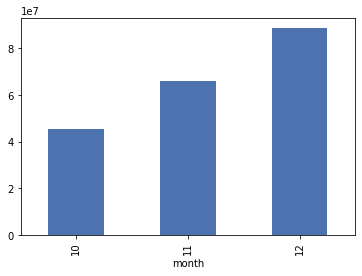

In [55]:
hol[(hol['year'] == 2010)].groupby('month')['Weekly_Sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='month'>

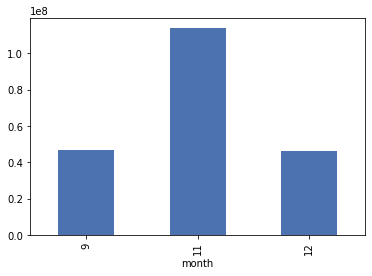

In [56]:
hol[(hol['year'] == 2011)].groupby('month')['Weekly_Sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='month'>

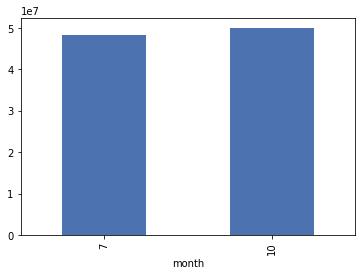

In [57]:
hol[(hol['year'] == 2012)].groupby('month')['Weekly_Sales'].sum().plot(kind='bar')

In [58]:
Store[(Store['Holiday_Flag'] == 0)].mean()

<ipython-input-58-159b82b41674>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Store[(Store['Holiday_Flag'] == 0)].mean()


Store               23.00
Weekly_Sales   1041256.38
Holiday_Flag         0.00
Temperature         61.45
Fuel_Price           3.37
CPI                171.60
Unemployment         7.99
year              2010.98
month                6.17
dtype: float64

In [59]:
C['Weekly_Sales'].mean()

998604.8716296293

In [60]:
T['Weekly_Sales'].mean()

1331487.4169629626

In [61]:
LD['Weekly_Sales'].mean()

1039182.8339999999

In [62]:
SB['Weekly_Sales'].mean()

nan

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

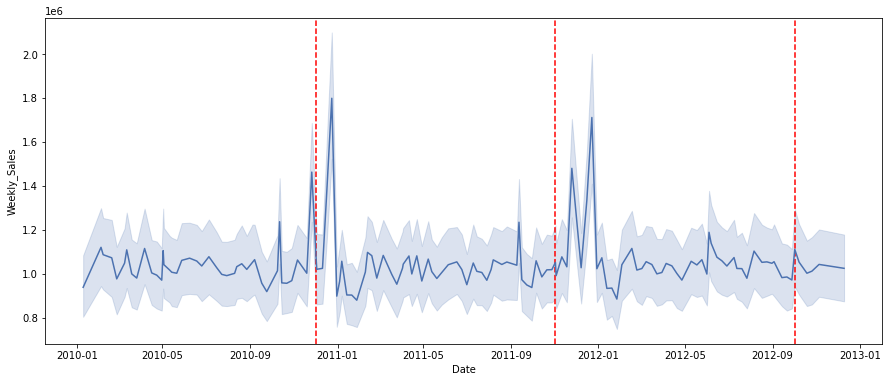

In [63]:
#Super_Bowl 
plt.figure(figsize = (15,6))

xposition = [pd.to_datetime('12-2-2010'), pd.to_datetime('11-2-2011'), pd.to_datetime('10-2-2012')]
for xc in xposition:
    plt.axvline(x=xc, color='r', linestyle='--')
    
sns.lineplot(x = 'Date', y = 'Weekly_Sales',data = Store)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

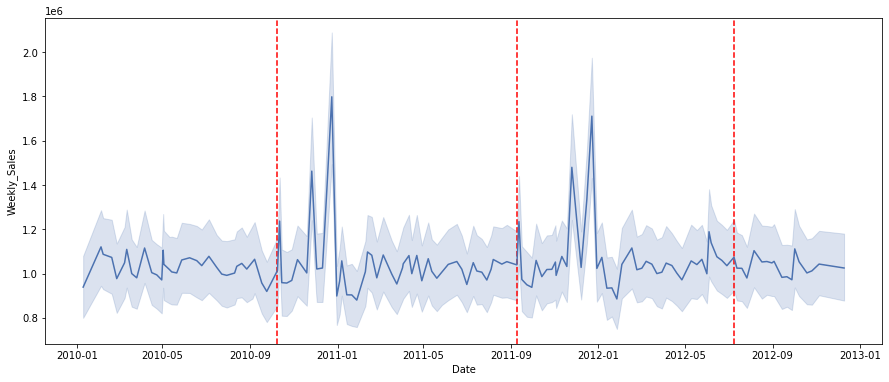

In [64]:
#Labors Day
plt.figure(figsize = (15,6))

xposition = [pd.to_datetime('10-9-2010'), pd.to_datetime('9-9-2011'), pd.to_datetime('7-9-2012')]
for xc in xposition:
    plt.axvline(x=xc, color='r', linestyle='--')
    
sns.lineplot(x = 'Date', y = 'Weekly_Sales',data = Store)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

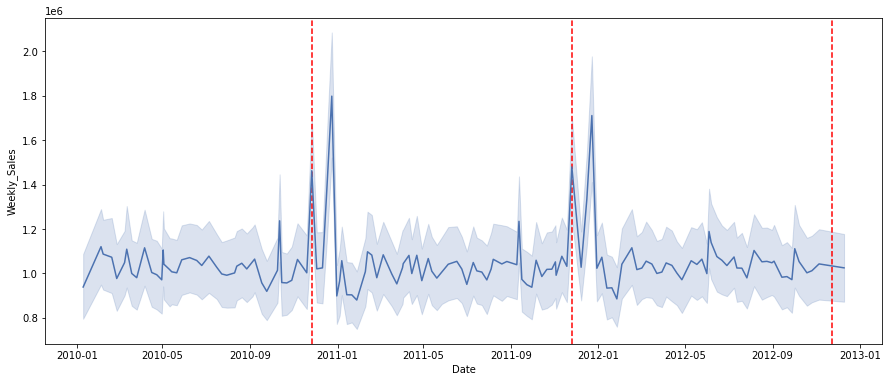

In [65]:
#Thanksgiving 
plt.figure(figsize = (15,6))

xposition = [pd.to_datetime('26-11-2010'), pd.to_datetime('25-11-2011'), pd.to_datetime('23-11-2012')]
for xc in xposition:
    plt.axvline(x=xc, color='r', linestyle='--')
    
sns.lineplot(x = 'Date', y = 'Weekly_Sales',data = Store)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

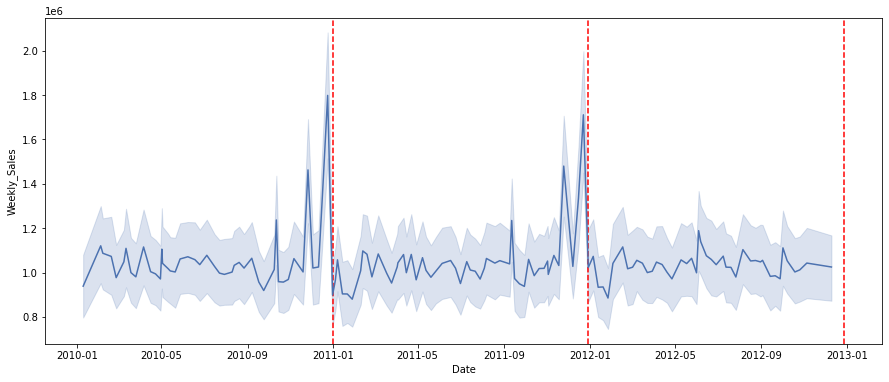

In [66]:
#Christmas  
plt.figure(figsize = (15,6))

xposition = [pd.to_datetime('31-12-2010'), pd.to_datetime('30-12-2011'), pd.to_datetime('28-12-2012')]
for xc in xposition:
    plt.axvline(x=xc, color='r', linestyle='--')
    
sns.lineplot(x = 'Date', y = 'Weekly_Sales',data = Store)

#### Notes:
Percentage of Holiday, sum sales per holiday and non holiday...
> only 7% are holiday

> Profits of 505,299,551 in holiday 

Mean temperature in holiday
> 50f

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
> Overall suming in holidays sales, every holyday except Super Bowl, have higher sales than the mean sales in non-holiday season

> while in the mean holiday sales, only Thanksgiving and Christmas have higher sales than the mean sales in non-holiday season

> The sales increased during thanksgiving. And the sales decreased during christmas

> Sales are increasing and decreasing over year in holidays


---

In [67]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


##### check relations bettwen variables

In [68]:
correlation2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
Store,1.0,-0.34,6.3e-20,-0.023,0.06,-0.21,0.22,0.0,3.1e-19
Weekly_Sales,-0.34,1.0,0.037,-0.064,0.0095,-0.073,-0.11,-0.018,0.068
Holiday_Flag,6.3e-20,0.037,1.0,-0.16,-0.078,-0.0022,0.011,-0.057,0.33
Temperature,-0.023,-0.064,-0.16,1.0,0.14,0.18,0.1,0.064,0.066
Fuel_Price,0.06,0.0095,-0.078,0.14,1.0,-0.17,-0.035,0.78,-0.053
CPI,-0.21,-0.073,-0.0022,0.18,-0.17,1.0,-0.3,0.075,0.0015
Unemployment,0.22,-0.11,0.011,0.1,-0.035,-0.3,1.0,-0.24,-0.0021
year,0.0,-0.018,-0.057,0.064,0.78,0.075,-0.24,1.0,-0.14
month,3.1e-19,0.068,0.33,0.066,-0.053,0.0015,-0.0021,-0.14,1.0


#### Notes:

> there are a weak negative correlation beetwen weekly sales and Store, this could be for the distribution of Stores

> there are a strong positive correlation between Fuel price and year, this mean fuel price is incrementing yearly

---

In [69]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\steve\anaconda3\lib\si

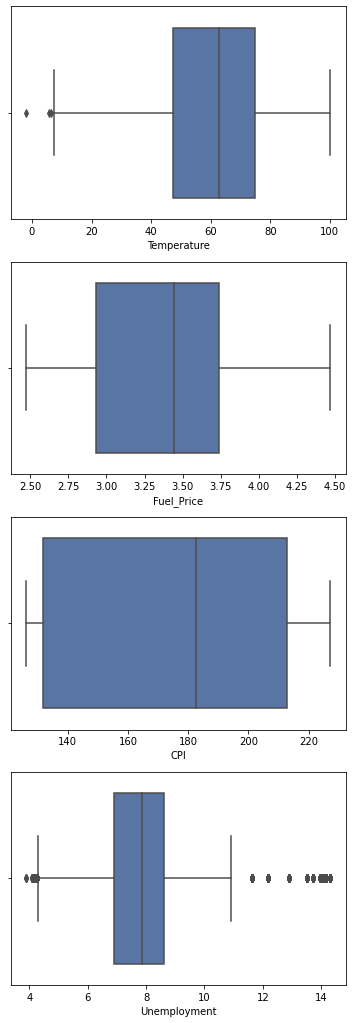

In [70]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = Store[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(Store[column], ax=axs[i])

In [71]:
# drop the outliers     
fixed_data = Store[(Store['Unemployment']<10) & (Store['Unemployment']>4.5) & (Store['Temperature']>10)]
fixed_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


In [72]:
#train_data = fixed_data.drop(['Date'], axis=1)
train_data = fixed_data[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]


In [73]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [74]:
X = fixed_data[['Store','Fuel_Price','CPI','Unemployment','month','year']]
Y = fixed_data['Weekly_Sales']

# Split data (0.80:0.20)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:
 
Accuracy: 13.126239491004931
Mean Absolute Error: 448837.9171006586
Mean Squared Error: 290041017282.76776
Root Mean Squared Error: 538554.5629578936


C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


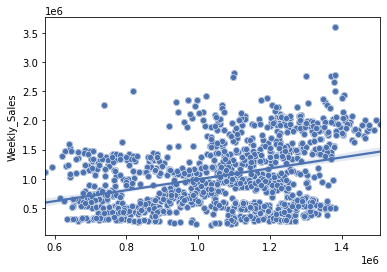

In [75]:
print('Linear Regression:')
print(' ')
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)


print('Accuracy:',regressor.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

sns.regplot(y_pred, Y_test, data=fixed_data);
sns.scatterplot(y_pred, Y_test);

Linear Regression:
 
Accuracy: 13.126239491004931
Mean Absolute Error: 446655.0168013443
Mean Squared Error: 289719082099.8817
Root Mean Squared Error: 538255.591796204


C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


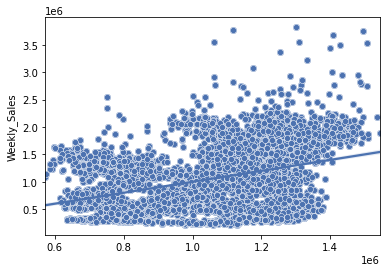

In [76]:
print('Linear Regression:')
print(' ')
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_train)


print('Accuracy:',regressor.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

sns.regplot(y_pred, Y_train, data=fixed_data);
sns.scatterplot(y_pred, Y_train);

In [77]:
hypothesiss = Store.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]
factors  = hypothesiss.get_group(1) #Filter by Store 1
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()
factors

<ipython-input-77-634ef7cfef6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors['Day'] = day_arr.copy()


,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.57,8.11,211.10,1643690.90,0,1
1,2.55,8.11,211.24,1641957.44,1,7
2,2.51,8.11,211.29,1611968.17,0,14
3,2.56,8.11,211.32,1409727.59,0,21
4,2.62,8.11,211.35,1554806.68,0,28
...,...,...,...,...,...,...
138,3.67,6.91,222.98,1437059.26,0,966
139,3.62,6.57,223.18,1670785.97,0,973
140,3.60,6.57,223.38,1573072.81,0,980
141,3.59,6.57,223.43,1508068.77,0,987


<Figure size 1080x432 with 0 Axes>

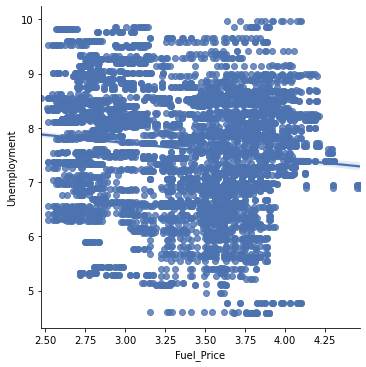

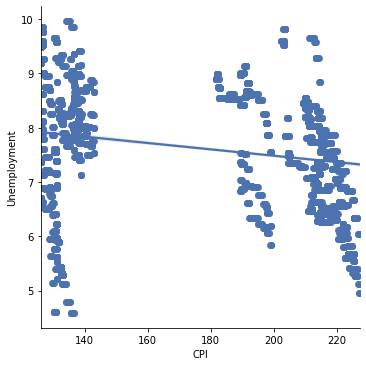

In [78]:
plt.figure(figsize = (15,6))
sns.lmplot(x='Fuel_Price', y = 'Unemployment', data = train_data)

sns.lmplot(x='CPI', y = 'Unemployment', data = train_data)

In [79]:
from scipy import stats
ttest,pval = stats.ttest_rel(train_data['Weekly_Sales'],train_data['CPI'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [80]:
from scipy import stats
ttest,pval = stats.ttest_rel(train_data['Weekly_Sales'],train_data['Fuel_Price'])
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


<Figure size 432x288 with 0 Axes>

In [81]:
from scipy import stats
ttest,pval = stats.ttest_rel(train_data['Weekly_Sales'],train_data['Unemployment'])
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


<Figure size 432x288 with 0 Axes>

#### notes: 

Linear Regression
Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

> As the Fuel_price and Cpi goes high, rate of Unemployment Decreases

> There is a very low correlation in the linear regression

hypothesis p-values

> CPI, Unemployment, and fuel price do not have any impact on sales

In [115]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [83]:
X_train.shape

(4526, 6)

In [84]:
Y_train.shape

(4526,)

In [110]:
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

In [111]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)

In [112]:
regressor.fit(dt_train, Y_train)

LinearRegression()

In [113]:
print("SCORE PCA: ", regressor.score(dt_test, Y_test)*100)


SCORE PCA:  12.01294402939872
